In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('/kaggle/input/udemy-courses/udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [10]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [11]:
df.shape

(3678, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [13]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

### subject

## How many number of subjects in this Dataset ?

In [16]:
print(f"{df['subject'].nunique()} subject => {df['subject'].unique()}")

4 subject => ['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


## How many courses are there in each subject ?

In [17]:
df['subject'].value_counts()

subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of courses are there in each subject')

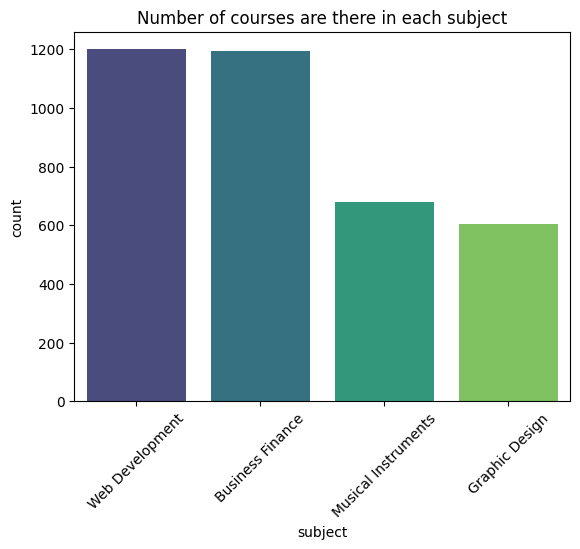

In [18]:
sns.countplot(data = df, x = 'subject', palette = 'viridis', order = df['subject'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('Number of courses are there in each subject')

- **The Most Popular Course is (Web Development)**

### subscribers 

## What is the number of subscribers per Subject ?

In [19]:
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

Text(0.5, 1.0, 'The number of subscribers per subject')

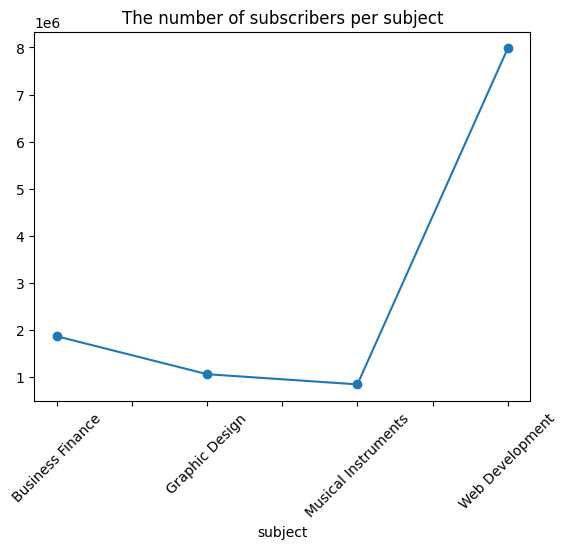

In [20]:
df.groupby('subject')['num_subscribers'].sum().plot(kind = 'line', marker = 'o')
plt.xticks(rotation = 45)
plt.title('The number of subscribers per subject')

## Average number of subscribers use agg func 

In [21]:
df.groupby('subject')['num_subscribers'].mean()

subject
Business Finance       1563.774895
Graphic Design         1763.097844
Musical Instruments    1245.130882
Web Development        6650.476667
Name: num_subscribers, dtype: float64

In [22]:
df.groupby('subject')['num_subscribers'].min()

subject
Business Finance        0
Graphic Design          0
Musical Instruments     0
Web Development        19
Name: num_subscribers, dtype: int64

In [23]:
df.groupby('subject')['num_subscribers'].max()

subject
Business Finance        65576
Graphic Design          53851
Musical Instruments    101154
Web Development        268923
Name: num_subscribers, dtype: int64

## What is the most course has highst number of subscribers ?

In [24]:
df['num_subscribers'].max()

268923

In [25]:
df[df['num_subscribers'] == df['num_subscribers'].max()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development


## What is the most course has lowest number of subscribers ?

In [26]:
df['num_subscribers'].min()

0

In [27]:
len(df[df['num_subscribers'] == df['num_subscribers'].min()])

70

### level column

## How many levels do we have ?

In [29]:
print(f"({df['level'].nunique()}) levels => {df['level'].unique()}")

(4) levels => ['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']


## What is the distribution of courses per levels ?

In [30]:
df['level'].value_counts()

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

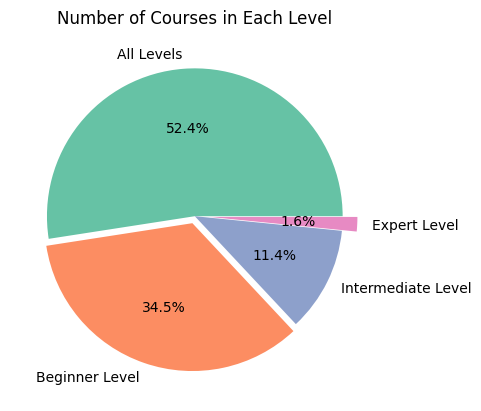

In [31]:
plt.pie(df['level'].value_counts(), autopct = '%1.1f%%',colors=sns.set_palette("Set2"), labels = df['level'].value_counts().index, explode = [0, 0.05, 0, 0.1])
plt.title('Number of Courses in Each Level')
plt.show()

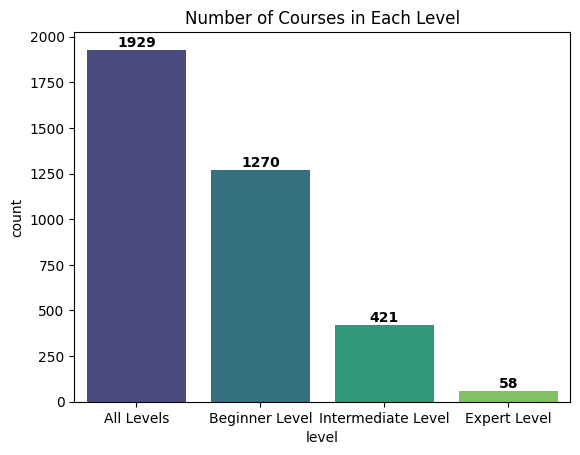

In [32]:
ax = sns.countplot(data = df, x = 'level', palette = 'viridis', order = df['level'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, fontweight="black")
plt.title('Number of Courses in Each Level')
plt.show()

## How many subscribers per level ?

In [42]:
sum_sub_per_level = pd.DataFrame(df.groupby('level')['num_subscribers'].sum().reset_index())
sum_sub_per_level

,level,num_subscribers
0,All Levels,6915076
1,Beginner Level,4051843
2,Expert Level,50196
3,Intermediate Level,742005


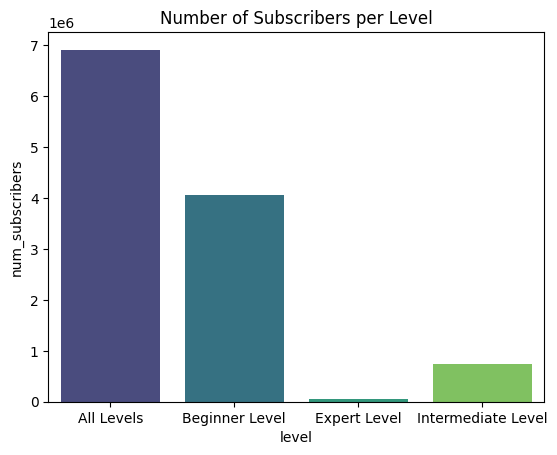

In [43]:
sns.barplot(data = sum_sub_per_level, x ='level' , y = 'num_subscribers', palette = 'viridis')
plt.title('Number of Subscribers per Level')
plt.show()

## How many levels per subject category ?

In [46]:
level_per_sub = pd.DataFrame(df.groupby('subject')['level'].value_counts().reset_index())
level_per_sub

,subject,level,count
0,Business Finance,All Levels,696
1,Business Finance,Beginner Level,340
2,Business Finance,Intermediate Level,128
3,Business Finance,Expert Level,31
4,Graphic Design,All Levels,298
5,Graphic Design,Beginner Level,243
6,Graphic Design,Intermediate Level,57
7,Graphic Design,Expert Level,5
8,Musical Instruments,Beginner Level,296
9,Musical Instruments,All Levels,276


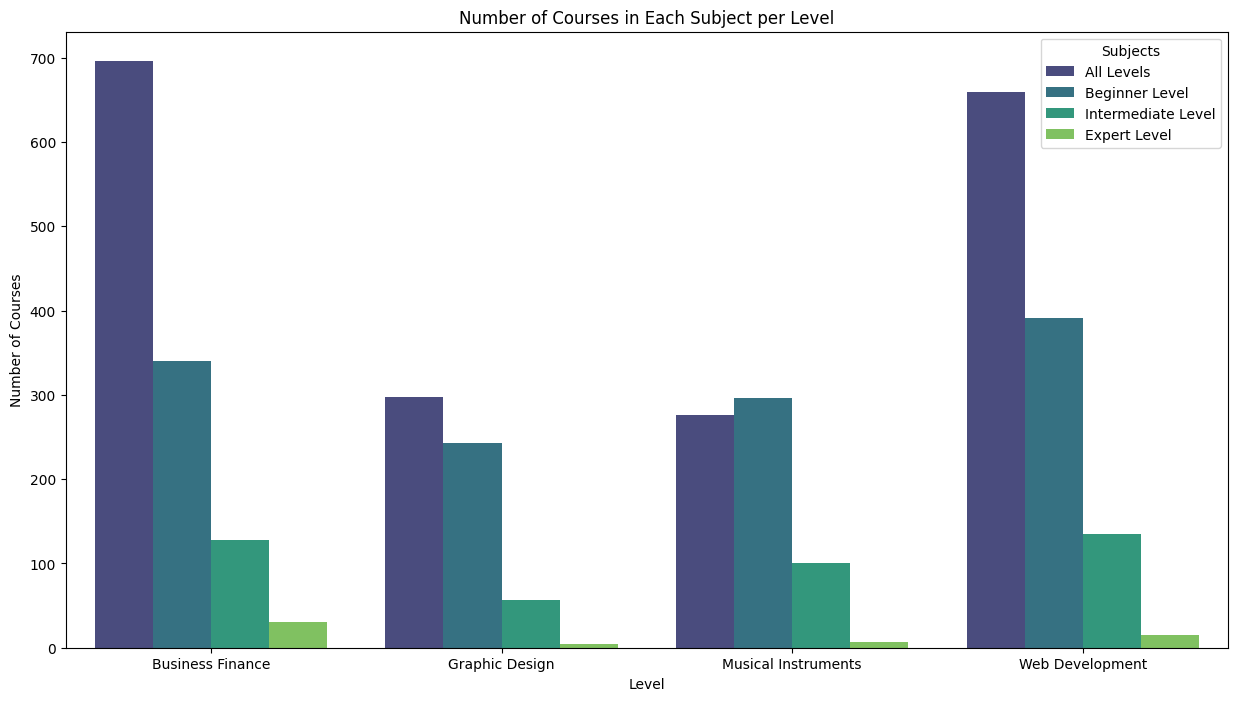

In [47]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=level_per_sub, x='subject', y='count', hue='level', palette='viridis')
plt.title('Number of Courses in Each Subject per Level')
plt.xlabel('Level')
plt.ylabel('Number of Courses')
plt.legend(title='Subjects')
plt.show()

### Lecture column

## What is number of reviews per level per subject

In [48]:
def func_draw(x):
    plt.figure(figsize = (15, 8))
    sns.barplot(data=df, x='level', y= x, hue='subject', palette='viridis', ci = None)
    plt.title(f'{x} in Each Subject per Level')
    plt.legend(title='Subjects')
    plt.show()

    #pie chart
    plt.figure(figsize = (5,5))
    df.groupby('level')[x].sum().plot(kind = 'pie', autopct = '%1.1f%%', explode = [0,0,0.1,0])
    plt.title(f'plot of {x} per level')
    plt.show()

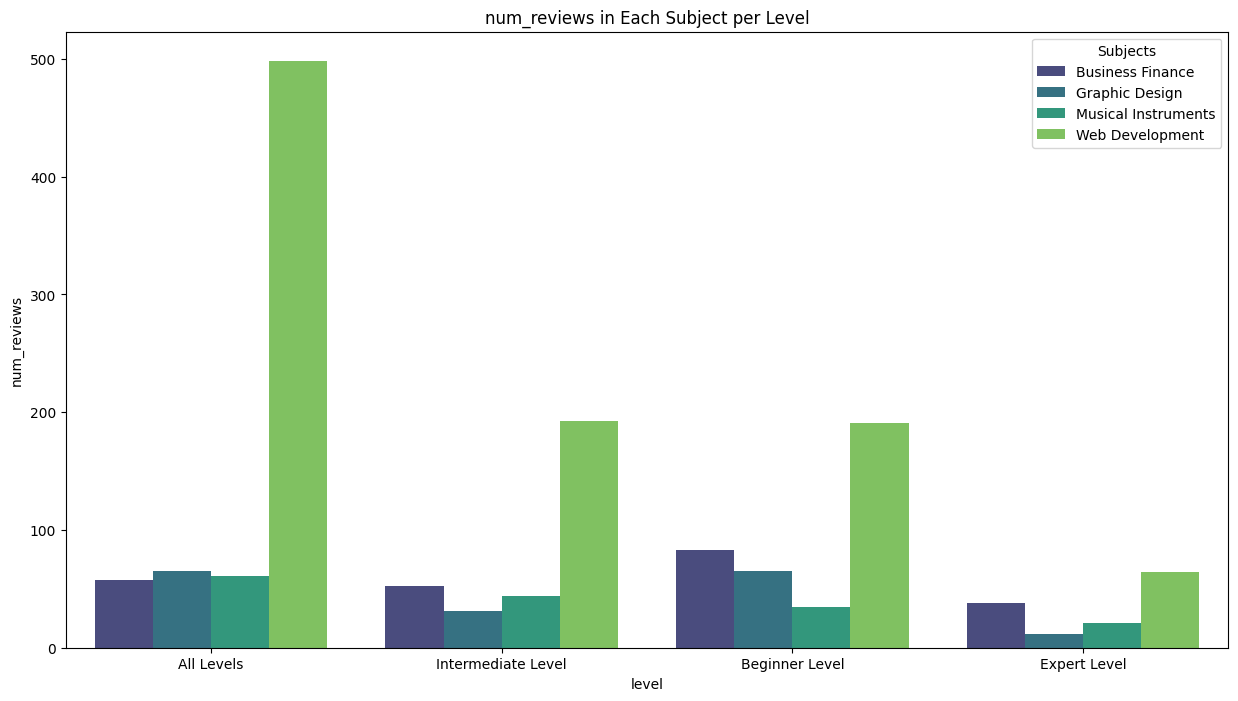

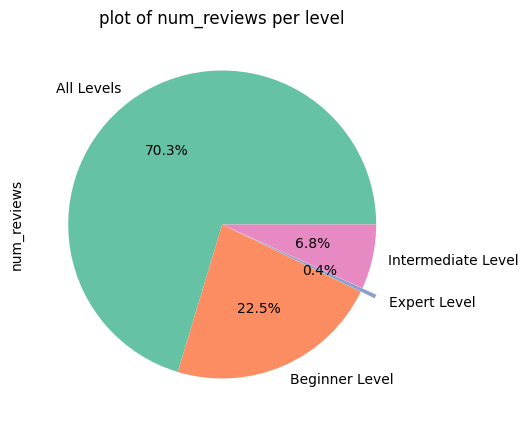

In [49]:
func_draw('num_reviews')

## What is number of lectures in each Subject per level ?

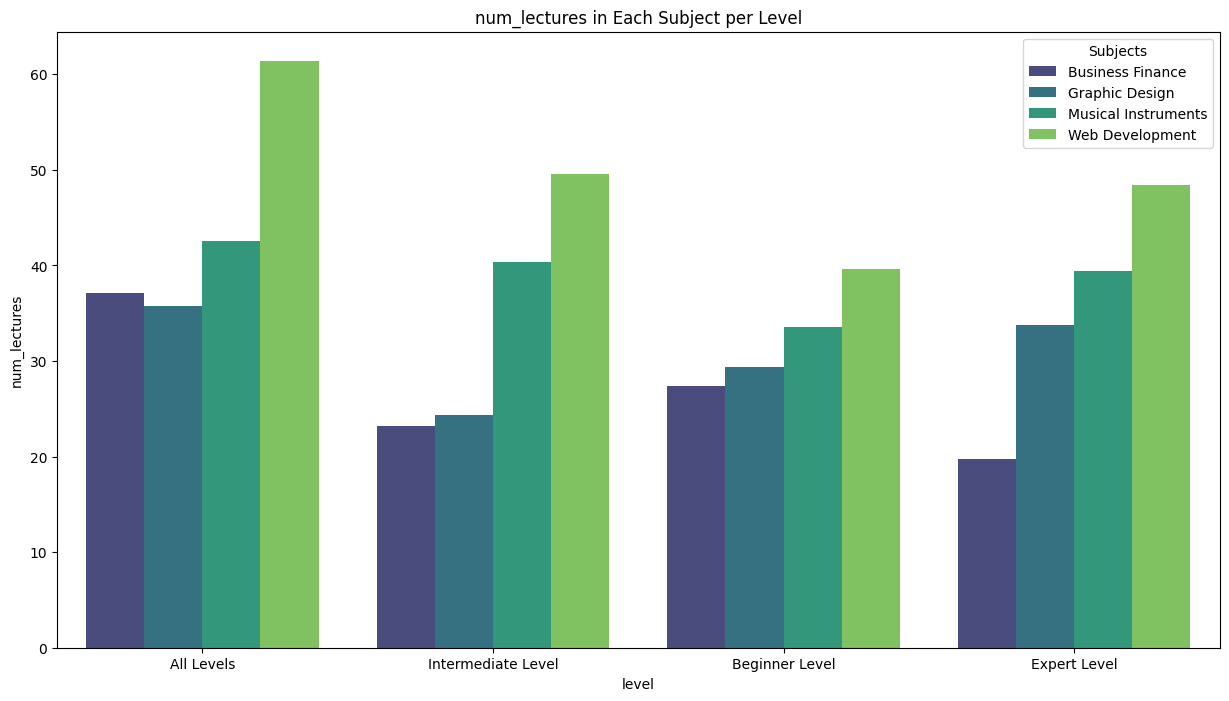

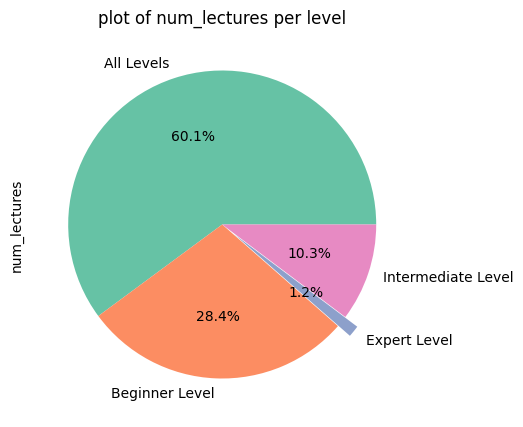

In [50]:
func_draw('num_lectures')

### Price column

## What is the average price of a courses ?

In [51]:
df.groupby('subject')['price'].mean()

subject
Business Finance       68.552301
Graphic Design         57.827529
Musical Instruments    49.558824
Web Development        77.033333
Name: price, dtype: float64

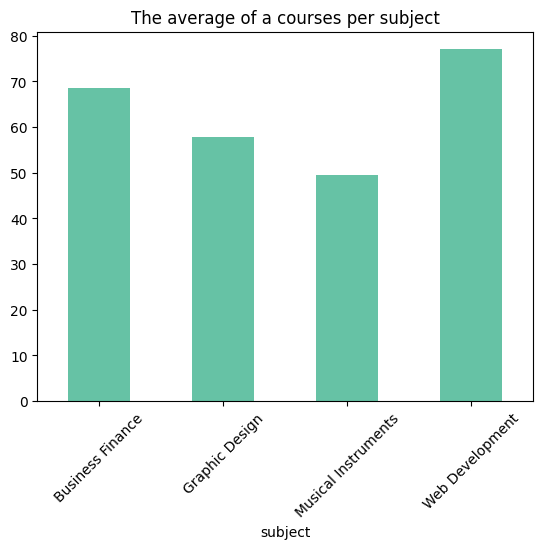

In [52]:
df.groupby('subject')['price'].mean().plot(kind = 'bar')
plt.title('The average of a courses per subject')
plt.xticks(rotation = 45)
plt.show()

## What is the min & max price ?

In [53]:
df['price'].max()

200

In [54]:
df['price'].min()

0

## What is the max and min course price per subject ?

In [55]:
df.groupby('subject')['price'].max()

subject
Business Finance       200
Graphic Design         200
Musical Instruments    200
Web Development        200
Name: price, dtype: int64

In [56]:
df.groupby('subject')['price'].min()

subject
Business Finance       0
Graphic Design         0
Musical Instruments    0
Web Development        0
Name: price, dtype: int64

## How much does Udemy earn ?

In [57]:
df['price'].sum()

242930

*profit = price * subscribers*

In [58]:
df['profit'] = df['price'] * df['num_subscribers']

In [59]:
df['profit']

0       429400
1       209400
2        97830
3       232845
4       255200
         ...  
3673    104000
3674      7650
3675     20520
3676     15000
3677     40545
Name: profit, Length: 3678, dtype: int64

## The most profitable course and location ?

In [60]:
df['profit'].max()

24316800

In [61]:
df[df['profit'] == df['profit'].max()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development,24316800


### is_paid column

## How many courses on Udemy are paid or free ?

In [62]:
df['is_paid'].value_counts()

is_paid
True     3368
False     310
Name: count, dtype: int64

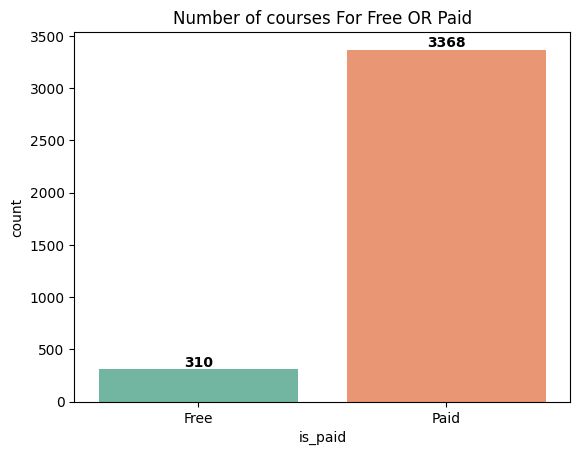

In [64]:
ax = sns.countplot(data = df, x = 'is_paid', palette = 'Set2')
plt.xticks([0, 1], ['Free', 'Paid'])
plt.title('Number of courses For Free OR Paid')
for container in ax.containers:
    ax.bar_label(container, fontweight="black")

## How many courses paid / free course in each subject category ?

In [65]:
df.groupby('subject')['is_paid'].value_counts()

subject              is_paid
Business Finance     True       1099
                     False        96
Graphic Design       True        568
                     False        35
Musical Instruments  True        634
                     False        46
Web Development      True       1067
                     False       133
Name: count, dtype: int64

In [68]:
course_paid_free = pd.DataFrame(df.groupby('subject')['is_paid'].value_counts().reset_index())
course_paid_free

,subject,is_paid,count
0,Business Finance,True,1099
1,Business Finance,False,96
2,Graphic Design,True,568
3,Graphic Design,False,35
4,Musical Instruments,True,634
5,Musical Instruments,False,46
6,Web Development,True,1067
7,Web Development,False,133


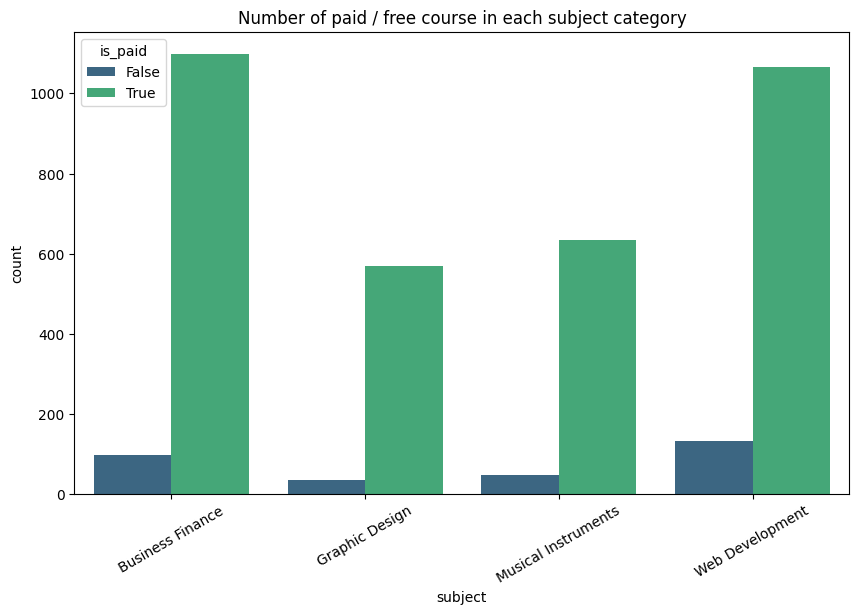

In [69]:
plt.figure(figsize = (10, 6))
sns.barplot(data = course_paid_free, x = 'subject', y = 'count', hue = 'is_paid', palette = 'viridis')
plt.title('Number of paid / free course in each subject category')
plt.xticks(rotation = 30)
plt.show()

## How many courses paid / free course in each Level ?

In [71]:
df.groupby('level')['is_paid'].value_counts()
level_paid_free = pd.DataFrame(df.groupby('level')['is_paid'].value_counts().reset_index())
level_paid_free

,level,is_paid,count
0,All Levels,True,1807
1,All Levels,False,122
2,Beginner Level,True,1112
3,Beginner Level,False,158
4,Expert Level,True,58
5,Intermediate Level,True,391
6,Intermediate Level,False,30


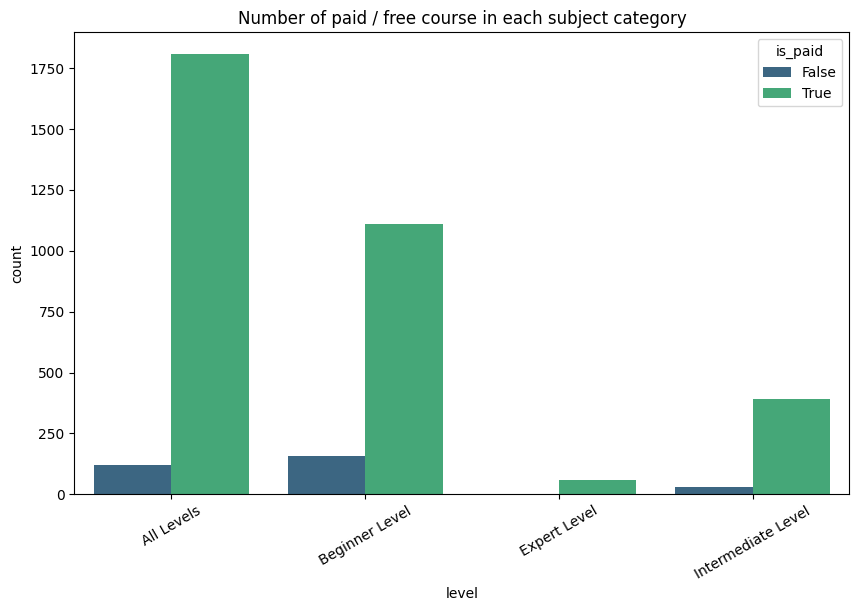

In [72]:
plt.figure(figsize = (10, 6))
sns.barplot(data = level_paid_free, x = 'level', y = 'count', hue = 'is_paid', palette = 'viridis')
plt.title('Number of paid / free course in each subject category')
plt.xticks(rotation = 30)
plt.show()

## What is the Longest/Shortest course title ?

In [73]:
df['course_title'].str.len()

0       34
1       59
2       56
3       50
4       44
        ..
3673    56
3674    55
3675    29
3676    54
3677    52
Name: course_title, Length: 3678, dtype: int64

In [74]:
df['course_title_len'] = df['course_title'].str.len()

- **Longest course title**

In [75]:
df['course_title_len'].max()

243

In [76]:
df['course_title_len'].idxmax()

2186

In [77]:
df.iloc[2186]

course_id                                                         286898
course_title           Aprende a tocar el Acordeón 'de oído y con téc...
url                    https://www.udemy.com/aprende-los-secretos-de-...
is_paid                                                             True
price                                                                 75
num_subscribers                                                      158
num_reviews                                                           17
num_lectures                                                          59
level                                                         All Levels
content_duration                                                     2.5
published_timestamp                                 2014-07-28T13:55:43Z
subject                                              Musical Instruments
profit                                                             11850
course_title_len                                   

- **Shortest course title**

In [78]:
df['course_title_len'].min()

6

In [79]:
df['course_title_len'].idxmin()

1324

In [80]:
df.iloc[1324]

course_id                                      1164570
course_title                                    调色高级讲解
url                    https://www.udemy.com/dezepioy/
is_paid                                           True
price                                              200
num_subscribers                                      4
num_reviews                                          2
num_lectures                                         8
level                                   Beginner Level
content_duration                                   1.0
published_timestamp               2017-03-31T17:16:15Z
subject                                 Graphic Design
profit                                             800
course_title_len                                     6
Name: 1324, dtype: object

### published_timestamp column

In [81]:
df['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3673    2016-06-14T17:36:46Z
3674    2017-03-10T22:24:30Z
3675    2015-12-30T16:41:42Z
3676    2016-08-11T19:06:15Z
3677    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3678, dtype: object

In [82]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3673    [2016-06-14, 17:36:46Z]
3674    [2017-03-10, 22:24:30Z]
3675    [2015-12-30, 16:41:42Z]
3676    [2016-08-11, 19:06:15Z]
3677    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3678, dtype: object

In [83]:
df['published_date'] = df['published_timestamp'].str.split('T').str.get(0)

In [84]:
df['published_date']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3673    2016-06-14
3674    2017-03-10
3675    2015-12-30
3676    2016-08-11
3677    2014-09-28
Name: published_date, Length: 3678, dtype: object

In [85]:
df['published_date'] = pd.to_datetime(df['published_date'])

In [86]:
df['published_date']

0      2017-01-18
1      2017-03-09
2      2016-12-19
3      2017-05-30
4      2016-12-13
          ...    
3673   2016-06-14
3674   2017-03-10
3675   2015-12-30
3676   2016-08-11
3677   2014-09-28
Name: published_date, Length: 3678, dtype: datetime64[ns]

In [87]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

In [88]:
df.drop('published_date', axis = 1, inplace = True)

In [89]:
df['year'].unique()

array([2017, 2016, 2014, 2015, 2013, 2012, 2011], dtype=int32)

## What is The total number of courses in each year 

In [90]:
df['year'].value_counts()

year
2016    1206
2015    1014
2017     715
2014     491
2013     202
2012      45
2011       5
Name: count, dtype: int64

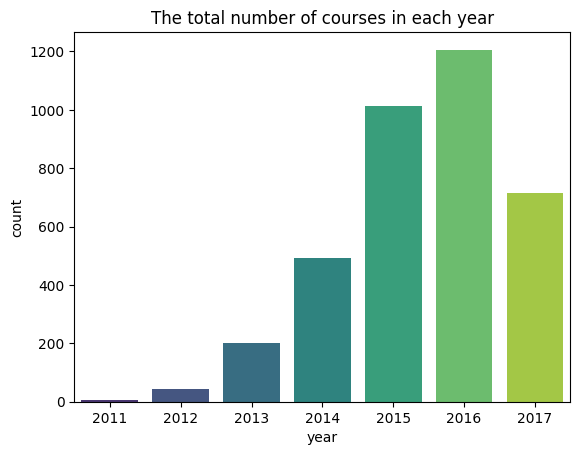

In [91]:
sns.countplot(data = df, x = 'year', palette = 'viridis')
plt.title('The total number of courses in each year')
plt.show()

***2016 The most year published Courses***

## What is the number of subscribers per year ?

In [92]:
df.groupby('year')['num_subscribers'].sum()

year
2011     119028
2012     555339
2013    1723438
2014    1930406
2015    3475324
2016    2966644
2017     988941
Name: num_subscribers, dtype: int64

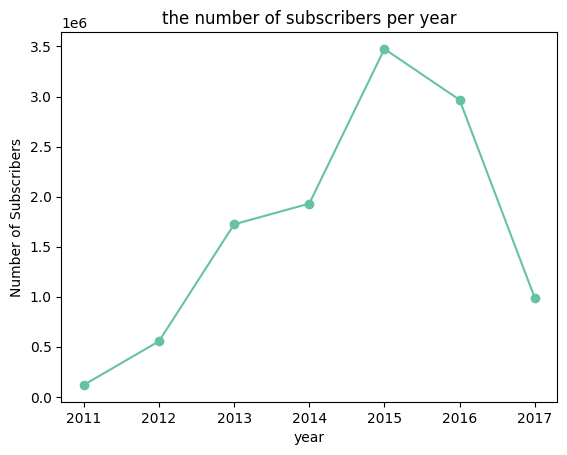

In [93]:
df.groupby('year')['num_subscribers'].sum().plot(kind = 'line', marker = 'o')
plt.title('the number of subscribers per year')
plt.ylabel('Number of Subscribers')
plt.show()

## What is the Plot of subscription per year per subject Category? 

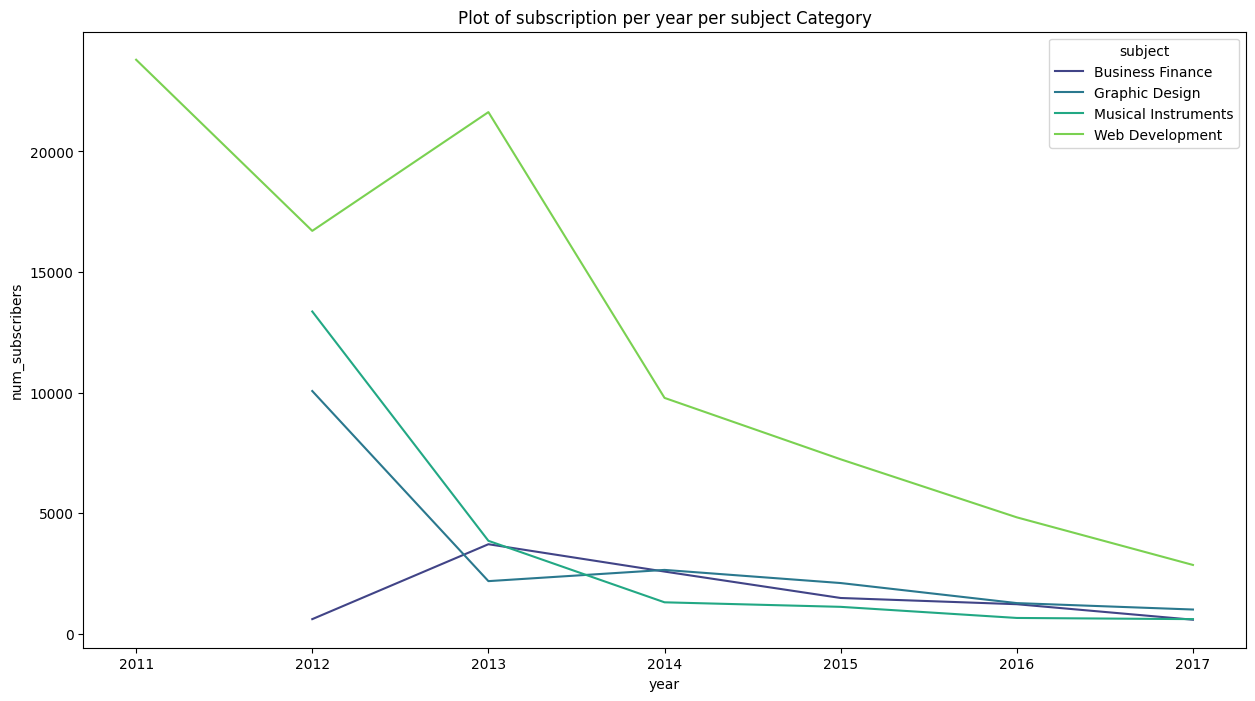

In [94]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df, x = 'year', y = 'num_subscribers', hue = 'subject', ci = None, palette = 'viridis')
plt.title('Plot of subscription per year per subject Category')
plt.show()

## What is the year has largest profit ?

In [95]:
df.groupby('year')['profit'].sum()

year
2011     11643420
2012     11773470
2013     72652195
2014    106939045
2015    314510395
2016    276633190
2017     90769600
Name: profit, dtype: int64

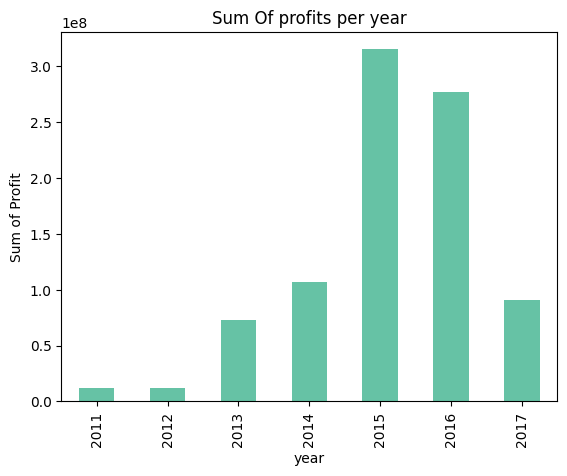

In [96]:
df.groupby('year')['profit'].sum().plot(kind = 'bar')
plt.title('Sum Of profits per year')
plt.ylabel('Sum of Profit')
plt.show()

- **2015 has The largest profit**